In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import preprocess as p
import explore as ex
import evaluate as e

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = w.get_zillow()
df.shape

found data


(52441, 9)

In [3]:
df = w.clean_zillow()
df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,county
0,4,3.5,3100,1023282,1998,Orange
1,2,1.0,1465,464000,1967,Ventura
2,3,2.0,1243,564778,1962,Orange
3,4,3.0,2376,145143,1970,Los Angeles
4,4,3.0,2962,773303,1950,Los Angeles


In [4]:
df.bedrooms.value_counts()

3     23339
4     15222
2      8330
5      3970
6       633
1       602
7       106
8        24
9         8
12        3
10        2
14        1
11        1
Name: bedrooms, dtype: int64

In [5]:
df.bathrooms.value_counts()

2.0     21879
3.0     10660
1.0      9534
2.5      3930
4.0      2227
3.5       913
1.5       839
5.0       802
4.5       682
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         2
18.0        1
13.0        1
Name: bathrooms, dtype: int64

In [6]:
df[df.square_ft == 0]

,bedrooms,bathrooms,square_ft,tax_value,year,county


In [7]:
df[df.tax_value == 0]

,bedrooms,bathrooms,square_ft,tax_value,year,county


In [8]:
df[df.year == 0]

,bedrooms,bathrooms,square_ft,tax_value,year,county


In [9]:
df = df[df.bedrooms != 0]

In [10]:
df = df[df.bathrooms != 0]

In [11]:
df.bedrooms.value_counts()

3     23339
4     15222
2      8330
5      3970
6       633
1       602
7       106
8        24
9         8
12        3
10        2
14        1
11        1
Name: bedrooms, dtype: int64

In [12]:
df.bathrooms.value_counts()

2.0     21879
3.0     10660
1.0      9534
2.5      3930
4.0      2227
3.5       913
1.5       839
5.0       802
4.5       682
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         2
18.0        1
13.0        1
Name: bathrooms, dtype: int64

In [13]:
df.shape

(52241, 6)

In [14]:
bin_bound = [0, 3.9, 6.9, 18]

bin_labels = ['1-3.5', '4-6.5', '7+']

df['bathrooms_binned'] = pd.cut(df['bathrooms'], bins = bin_bound, labels = bin_labels)
df[df.bathrooms == 18]

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned
5740,14,18.0,18654,49061236,1927,Los Angeles,7+


In [15]:
df.bathrooms_binned.value_counts()

1-3.5    47755
4-6.5     4304
7+         182
Name: bathrooms_binned, dtype: int64

In [16]:
bin_bound = [0, 3.9, 6.9, 14]

bin_labels = ['1-3', '4-6', '7+']

df['bedrooms_binned'] = pd.cut(df['bedrooms'], bins = bin_bound, labels = bin_labels)
df[df.bedrooms == 1]

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned
88,1,1.0,455,86152,1922,Orange,1-3.5,1-3
210,1,3.0,1619,1664376,1949,Los Angeles,1-3.5,1-3
227,1,1.0,528,342000,1929,Los Angeles,1-3.5,1-3
287,1,1.0,784,188067,1952,Los Angeles,1-3.5,1-3
466,1,1.0,520,32640,1922,Los Angeles,1-3.5,1-3
...,...,...,...,...,...,...,...,...
51979,1,1.0,512,58300,1923,Los Angeles,1-3.5,1-3
52056,1,1.0,588,320000,1921,Los Angeles,1-3.5,1-3
52211,1,2.0,2508,183902,1958,Orange,1-3.5,1-3
52255,1,1.0,800,913725,1932,Los Angeles,1-3.5,1-3


In [17]:
df['total_rooms'] = df.bedrooms + df.bathrooms

In [18]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms
0,4,3.5,3100,1023282,1998,Orange,1-3.5,4-6,7.5
1,2,1.0,1465,464000,1967,Ventura,1-3.5,1-3,3.0
2,3,2.0,1243,564778,1962,Orange,1-3.5,1-3,5.0
3,4,3.0,2376,145143,1970,Los Angeles,1-3.5,4-6,7.0
4,4,3.0,2962,773303,1950,Los Angeles,1-3.5,4-6,7.0


In [19]:
df.square_ft.value_counts()

1120    127
1200    118
1080    101
936      86
1040     86
       ... 
3079      1
9843      1
7088      1
604       1
5655      1
Name: square_ft, Length: 4710, dtype: int64

In [20]:
bin_bound = [0, 1500, 2000, 3000, 21929 ]

bin_labels = ['0-1500', '1501-2000', '2001-3000', '3000+']

df['square_ft_binned'] = pd.cut(df['square_ft'], bins = bin_bound, labels = bin_labels)
df[df.bedrooms == 1]

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned
88,1,1.0,455,86152,1922,Orange,1-3.5,1-3,2.0,0-1500
210,1,3.0,1619,1664376,1949,Los Angeles,1-3.5,1-3,4.0,1501-2000
227,1,1.0,528,342000,1929,Los Angeles,1-3.5,1-3,2.0,0-1500
287,1,1.0,784,188067,1952,Los Angeles,1-3.5,1-3,2.0,0-1500
466,1,1.0,520,32640,1922,Los Angeles,1-3.5,1-3,2.0,0-1500
...,...,...,...,...,...,...,...,...,...,...
51979,1,1.0,512,58300,1923,Los Angeles,1-3.5,1-3,2.0,0-1500
52056,1,1.0,588,320000,1921,Los Angeles,1-3.5,1-3,2.0,0-1500
52211,1,2.0,2508,183902,1958,Orange,1-3.5,1-3,3.0,2001-3000
52255,1,1.0,800,913725,1932,Los Angeles,1-3.5,1-3,2.0,0-1500


In [21]:
len(df[df.square_ft < 1500])

21120

In [22]:
len(df[(df['square_ft'] > 1500) & (df['square_ft'] < 2000)])


12956

In [23]:
len(df[(df['square_ft'] > 2000) & (df['square_ft'] < 3000)])


12081

In [24]:
len(df[df.square_ft > 3000])

5996

In [25]:
df.square_ft.max()

21929

In [26]:
len(df[df.year>1970])

18330

In [27]:
df.year.min()

1878

In [28]:
bin_bound = [0, 1979, 1989, 1999, 2009, 2020 ]

bin_labels = ['<1970', '1980', '1990', '2000', '2010']

df['decade'] = pd.cut(df['year'], bins = bin_bound, labels = bin_labels)
df[df.bedrooms == 1]

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned,decade
88,1,1.0,455,86152,1922,Orange,1-3.5,1-3,2.0,0-1500,<1970
210,1,3.0,1619,1664376,1949,Los Angeles,1-3.5,1-3,4.0,1501-2000,<1970
227,1,1.0,528,342000,1929,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970
287,1,1.0,784,188067,1952,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970
466,1,1.0,520,32640,1922,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970
...,...,...,...,...,...,...,...,...,...,...,...
51979,1,1.0,512,58300,1923,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970
52056,1,1.0,588,320000,1921,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970
52211,1,2.0,2508,183902,1958,Orange,1-3.5,1-3,3.0,2001-3000,<1970
52255,1,1.0,800,913725,1932,Los Angeles,1-3.5,1-3,2.0,0-1500,<1970


In [29]:
df.year.max()

2016

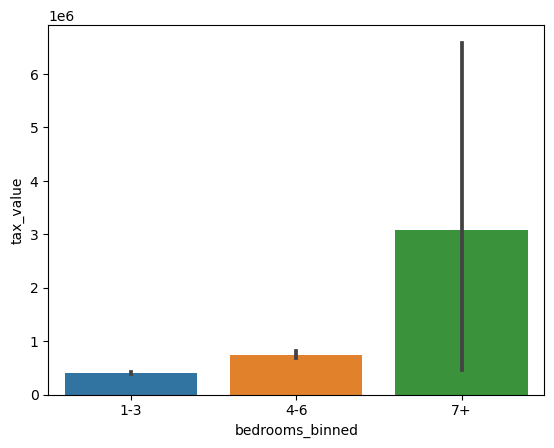

In [30]:
sns.barplot(data = df.sample(3_000), x='bedrooms_binned', y='tax_value')
plt.show()

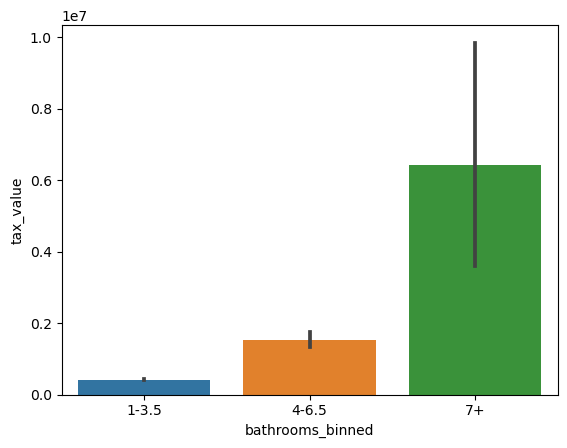

In [31]:
sns.barplot(data = df.sample(3_000), x='bathrooms_binned', y='tax_value')
plt.show()

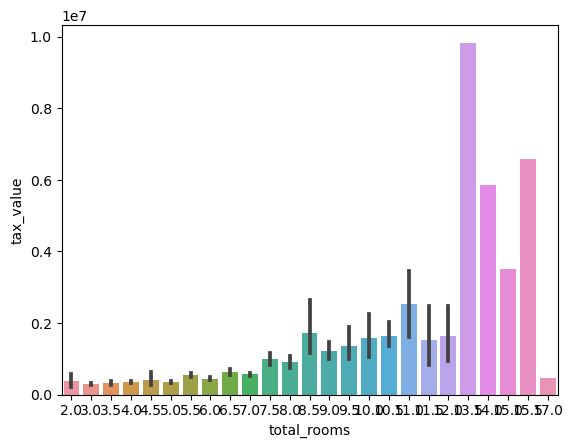

In [32]:
sns.barplot(data = df.sample(3_000), x='total_rooms', y='tax_value')
plt.show()

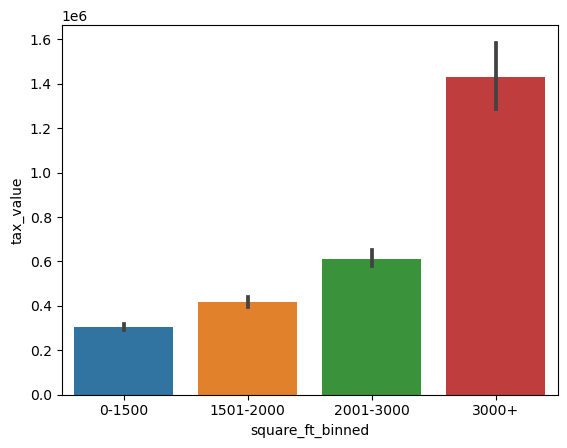

In [33]:
sns.barplot(data = df.sample(3_000), x='square_ft_binned', y='tax_value')
plt.show()

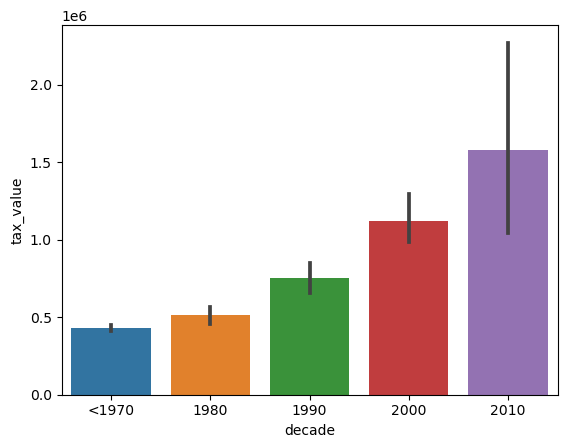

In [34]:
sns.barplot(data = df.sample(3_000), x='decade', y='tax_value')
plt.show()

<Figure size 640x480 with 0 Axes>

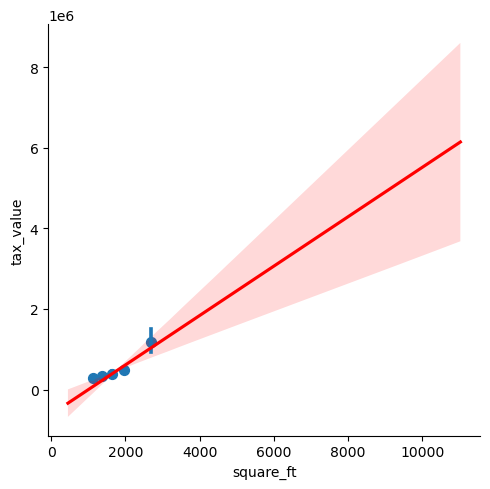

In [35]:
plt.figure()
sns.lmplot(x="square_ft", y="tax_value", data= df.sample(1_000), line_kws={'color': 'red'}, x_bins= 5)
plt.show()

<Axes: xlabel='decade', ylabel='tax_value'>

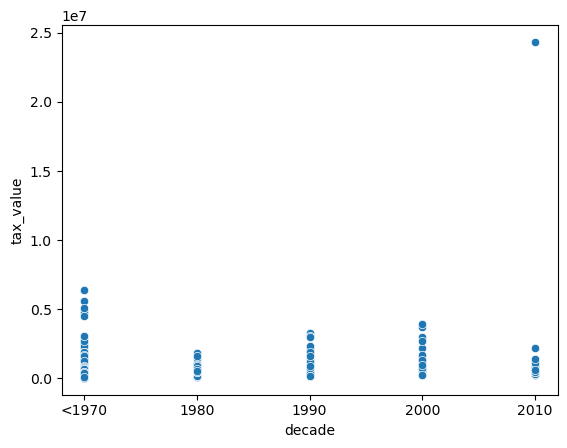

In [36]:
sns.scatterplot(x = 'decade', y = 'tax_value', data = df.sample(1_000))

In [37]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned,decade
0,4,3.5,3100,1023282,1998,Orange,1-3.5,4-6,7.5,3000+,1990
1,2,1.0,1465,464000,1967,Ventura,1-3.5,1-3,3.0,0-1500,<1970
2,3,2.0,1243,564778,1962,Orange,1-3.5,1-3,5.0,0-1500,<1970
3,4,3.0,2376,145143,1970,Los Angeles,1-3.5,4-6,7.0,2001-3000,<1970
4,4,3.0,2962,773303,1950,Los Angeles,1-3.5,4-6,7.0,2001-3000,<1970


In [47]:
train, val, test = p.split_data(df)

In [48]:
train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned,decade,total_rooms_bin
44648,4,2.0,1430,316414,1946,Los Angeles,1-3.5,4-6,6.0,0-1500,<1970,6
33031,2,1.0,1547,66845,1938,Los Angeles,1-3.5,1-3,3.0,1501-2000,<1970,3
810,3,2.0,2051,474197,1985,Ventura,1-3.5,1-3,5.0,2001-3000,1980,5
11555,3,4.0,2603,256558,1948,Los Angeles,4-6.5,1-3,7.0,2001-3000,<1970,32
33070,3,3.0,2953,1155958,2000,Orange,1-3.5,1-3,6.0,2001-3000,2000,6


<Axes: xlabel='bedrooms', ylabel='tax_value'>

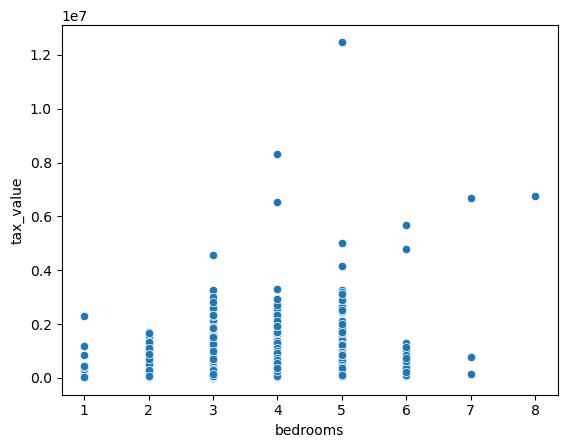

In [49]:
sns.scatterplot(x = 'bedrooms', y = 'tax_value', data = train.sample(2_000))

In [50]:
train.bedrooms.max()

14

In [51]:
train.bathrooms.max()

18.0

<Figure size 640x480 with 0 Axes>

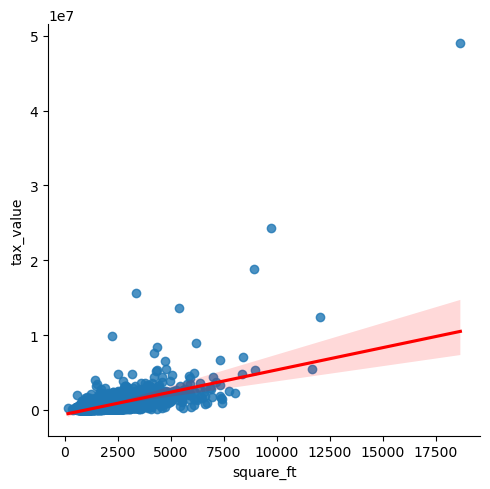

In [52]:
plt.figure()
sns.lmplot(x="square_ft", y="tax_value", data= train.sample(5_000), line_kws={'color': 'red'})
plt.show()

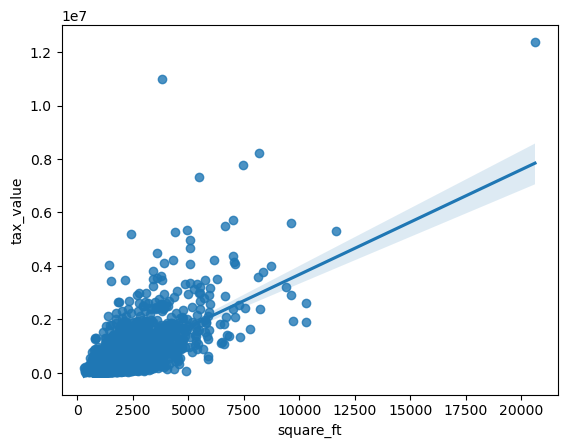

In [53]:
sns.regplot(x='square_ft', y='tax_value', data=train.sample(5_000))

plt.show()

In [ ]:
sns.regplot(x='year', y='tax_value', data=train.sample(5_000))

plt.show()

In [ ]:
plt.figure()
sns.lmplot(x="year", y="tax_value", data= train.sample(5_000), line_kws={'color': 'red'})
plt.show()

In [39]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned,decade
0,4,3.5,3100,1023282,1998,Orange,1-3.5,4-6,7.5,3000+,1990
1,2,1.0,1465,464000,1967,Ventura,1-3.5,1-3,3.0,0-1500,<1970
2,3,2.0,1243,564778,1962,Orange,1-3.5,1-3,5.0,0-1500,<1970
3,4,3.0,2376,145143,1970,Los Angeles,1-3.5,4-6,7.0,2001-3000,<1970
4,4,3.0,2962,773303,1950,Los Angeles,1-3.5,4-6,7.0,2001-3000,<1970


In [40]:
df.total_rooms.value_counts()

5.0     13853
6.0      8850
4.0      6215
7.0      6135
3.0      5136
8.0      2613
5.5      1999
6.5      1868
9.0      1132
7.5       739
4.5       695
10.0      580
2.0       530
8.5       492
9.5       342
11.0      296
3.5       229
10.5      192
12.0      106
13.0       64
11.5       57
14.0       32
12.5       28
15.0       19
16.0       11
13.5        9
17.0        6
18.0        5
20.0        2
2.5         1
19.0        1
32.0        1
14.5        1
15.5        1
21.0        1
Name: total_rooms, dtype: int64

In [42]:
bin_bound = [0, 3.9, 4.9, 5.9, 6.9, 33]

bin_labels = [3, 4, 5, 6, 32]

df['total_rooms_bin'] = pd.cut(df['total_rooms'], bins = bin_bound, labels = bin_labels)

In [44]:
df.tail()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,total_rooms,square_ft_binned,decade,total_rooms_bin
52436,4,2.0,1633,346534,1962,Los Angeles,1-3.5,4-6,6.0,1501-2000,<1970,6
52437,2,2.0,1286,354621,1940,Los Angeles,1-3.5,1-3,4.0,0-1500,<1970,4
52438,4,2.0,1612,67205,1964,Ventura,1-3.5,4-6,6.0,1501-2000,<1970,6
52439,3,1.0,1032,49546,1954,Los Angeles,1-3.5,1-3,4.0,0-1500,<1970,4
52440,3,2.0,1762,522000,1955,Los Angeles,1-3.5,1-3,5.0,1501-2000,<1970,5
